## Simulation und Modellierung WS 17/18 Uebung 07 : 
### Methode der kleinsten quadratischen Abweichungen

### <u>Aufgabe 1</u>

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve, wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen entweder Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder die matplotlib Funktion `mpl.contour(X,Y,f(X,Y),[1.0])` mit `X,Y = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))`, um die Hoehenlinie $f(X,Y)=1$ darzustellen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

In [1]:
from pylab import *
%matplotlib inline

In [12]:
data=np.loadtxt('orbit.dat')
print(data.shape)
print(data)

(200, 2)
[[-1.20857     0.974792  ]
 [-1.2049      0.976515  ]
 [-1.19696     0.977973  ]
 [-1.18588     0.980293  ]
 [-1.18044     0.982202  ]
 [-1.17848     0.981927  ]
 [-1.17476     0.982631  ]
 [-1.16185     0.987245  ]
 [-1.15288     0.984763  ]
 [-1.15006     0.986735  ]
 [-1.14931     0.986688  ]
 [-1.14642     0.990443  ]
 [-1.13974     0.989017  ]
 [-1.13077     0.992144  ]
 [-1.12616     0.991462  ]
 [-1.12212     0.992086  ]
 [-1.11123     0.992223  ]
 [-1.09649     0.993853  ]
 [-1.09655     0.995136  ]
 [-1.08767     0.995373  ]
 [-1.08287     0.998548  ]
 [-1.07802     0.995568  ]
 [-1.06465     0.999314  ]
 [-1.06125     0.998521  ]
 [-1.04732     0.998509  ]
 [-1.03637     0.998279  ]
 [-1.02375     0.998976  ]
 [-1.01903     0.999158  ]
 [-1.01568     0.998531  ]
 [-1.01301     1.00144   ]
 [-0.98984     0.999122  ]
 [-0.984655    0.998645  ]
 [-0.969766    0.999573  ]
 [-0.966606    0.999494  ]
 [-0.945412    0.997193  ]
 [-0.937938    0.997656  ]
 [-0.930556    0.99

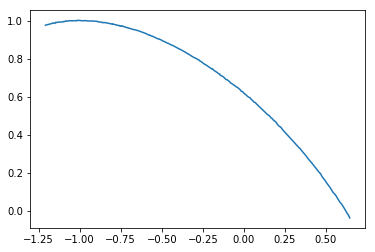

In [4]:
x=data[:,0]
y=data[:,1]
plot(x,y)
show()

geschlossene Kurve


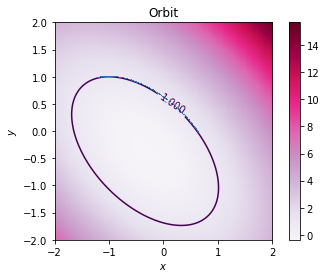

In [2]:
data=np.loadtxt('orbit.dat') # Lädt die x und y Werte der Datei Orbit in das array data
N = data.shape[0]            # N ist die Anzahl der Zeilen in data
x = data[:,0]                # x ist ein Vektor mit den x-Werten aus data
y = data[:,1]                # y ist ein Vektor mit den y-Werten aus data

A = np.zeros(N*5)            # leere Matrix A mit gleich vielen Zeilen wie data und 5 Spalten, da 5 Koeffizienten in der Gleichung sind
A.shape = (N,5)

A[:,0] = x**2                # in der ersten Spalte werden die x_Werte quadriert
A[:,1] = x * y               # in der zweiten die x- und y-Werte multipliziert
A[:,2] = y**2                # in der dritten Spalte werden die y_Werte quadriert
A[:,3] = x                   # in der vierten sind nur die x-Werte
A[:,4] = y                   # in der fünften sind nur die y-Werte

A_trans = A.transpose()      # hier wir die Transponierte von A erstellt 
b = np.ones(N)               # b ist ein Vektor aus Einsen der Länge N    

A_new = A_trans.dot(A)       # hier wird die transponierte von A mit A multipliziert = A_new
b_new = A_trans.dot(b)       # hier wird die transponierte von A mit b multipliziert = b_new
c = np.linalg.solve(A_new,b_new) # hier wird das lineare Gleichungssystem aus A_new * c = b_new gelöst. 
                                 # Die Elemente in c sind die Koeffzienten A,B,C,D,E, die die quadratische Abweichung minimieren

prüf = c[1]**2 - 4 * c[0] * c[2] # hier wird die Prüfzahl anhand der Gleichung aus der Aufgabenstellung erstellt. 

if prüf < 0:                     # ist die Prüfzahl kleiner 0, handelt es sich um eine geschlossene Kurve
    print("geschlossene Kurve")
elif prüf == 0:                  # ist die Prüfzahl gleich 0, handelt es sich um eine Parabel
    print("Parabel")
else:                            # ist die Prüfzahl größer 0, handelt es sich um eine Hyperbel
    print("Hyperbel")

fig1, ax1 = plt.subplots(ncols=1,nrows=1) # erstellt figure und axes
plt.title("Orbit")                        # gibt Titel
plt.xlabel("$x$")                         # gibt x-Achsen Beschriftung
plt.ylabel("$y$")                         # gibt y-Achsen Beschriftung
X,Y = meshgrid(linspace(-2,2,200),linspace(-2,2,200))                           # meshgrid(x,y) wird benutzt, um aus zwei Containern mit x- und y-Werten zwei 2d Arrays X und Y zu erstellen
f = c[0] * X**2 + c[1] * X * Y + c[2] * Y**2 + c[3] * X + c[4] * Y              # Funktion des Kegelschnittes in Abhängigkeit von X und Y
plt.imshow(f,interpolation='none',origin='lower',extent=[-2,2,-2,2],cmap="PuRd")# plottet f in Abhängigkeit von X und Y und in pink :)
colorbar()                                                                      # erstellt eine Farbskala
cp = plt.contour(X,Y,f,[1.0])                                                   # erstellt eine Konturlinie für alle Werte bei denen gilt f(X,Y) = 1
clabel(cp)                                                                      
plot(x,y,',')                                                                   # plottet einzelne, unverbundene y-Werte aus Orbit in Abhängigkeit der x-Werte aus Orbit
fig1.savefig("EinStuhlimOrbit.pdf", facecolor='w', edgecolor='w', format="pdf", transparent=False) 
# hier wird die Grafik als pdf gespeichert 
show()                                    # die Grafik wird gezeigt

### <u>Zusatzaufgabe</u>

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Feldern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen. *Hinweis* : `np.random.randn(N)` generiert ein Feld mit N standard normalverteilten Zufallszahlen)
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.